<h1>import</h1>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<h2>Load Dataset</h2>

In [2]:
x_train = np.loadtxt('input.csv',delimiter=',')
y_train = np.loadtxt('labels.csv',delimiter=',')

x_test = np.loadtxt('input_test.csv',delimiter=',')
y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [3]:
x_train= x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)

x_test= x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

x_train=x_train/255.0
x_test=x_test/255.0

# Data augmentation to improve training
datagen =ImageDataGenerator(
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip= True,
    zoom_range=0.2

)

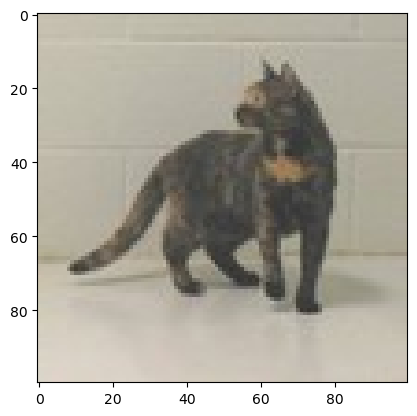

In [4]:
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

<h2>model</h2>


In [15]:
model=Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation="relu"),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

 Compile model

In [17]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Train model



In [18]:
model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=5,
    validation_data=(x_test, y_test),
    verbose=1
)

e:\clg\anoaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.4930 - loss: 0.7005 - val_accuracy: 0.5525 - val_loss: 0.6927
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.5350 - loss: 0.6926 - val_accuracy: 0.5450 - val_loss: 0.6873
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.5730 - loss: 0.6813 - val_accuracy: 0.6250 - val_loss: 0.6602
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5980 - loss: 0.6707 - val_accuracy: 0.6250 - val_loss: 0.6477
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5955 - loss: 0.6724 - val_accuracy: 0.6100 - val_loss: 0.6508


In [19]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6100 - loss: 0.6508


[0.6507639288902283, 0.6100000143051147]

<H2>MAKING PREDICTION</H2>

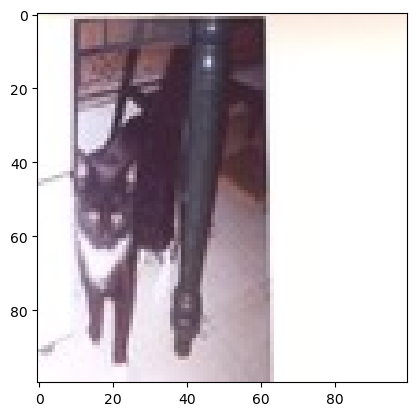

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction: False


In [23]:
idx = random.randint(0, len(x_test) - 1)
plt.imshow(x_test[idx])
plt.show()

sample = x_test[idx].reshape(1, 100, 100, 3)
y_pred = model.predict(sample)
y_pred = (y_pred > 0.5)

print("Prediction:", y_pred[0][0])
